# 词云图


### 1. 初始设置

首先，导入所需的库，并设置中文字体等。

In [1]:
# 导入所需的库
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import re
import jieba
import wordcloud
from imageio import imread

%matplotlib inline

# 正常显示中文标签
mpl.rcParams['font.sans-serif'] = ['SimHei']

# 自动适应布局
mpl.rcParams.update({'figure.autolayout': True})

# 正常显示负号
mpl.rcParams['axes.unicode_minus'] = False

# 定义颜色，主色：蓝色，辅助色：灰色，互补色：橙色
colors = {'蓝色':'#00589F', '深蓝色':'#003867', '浅蓝色':'#5D9BCF',
          '灰色':'#999999', '深灰色':'#666666', '浅灰色':'#CCCCCC',
          '橙色':'#F68F00', '深橙色':'#A05D00', '浅橙色':'#FBC171'}

### 2. 定义数据

基于心形曲线的公式：$ (x^2+y^2-1)^3-x^2*y^3=0 $

In [2]:
# 生成心形曲线的数据
x_coords = np.linspace(-3, 3, 500)
y_coords = np.linspace(-3, 3, 500)
points = []
for y in y_coords:
    for x in x_coords:
        if(x**2+y**2-1)**3 <= x**2*y**3:
            points.append({ "x": x, "y": y})
heart_x = list(map( lambda point: point[ "x"], points))
heart_y = list(map( lambda point: point[ "y"], points))

# 设置动画图片的张数
frames = 100
# 切分列表
points = [int(x) for x in np.linspace(0, len(heart_x), frames)]

### 3. 开始画图

用「**面向对象**」的方法画图。

#### 3.1 制作爱心动画和爱心图片

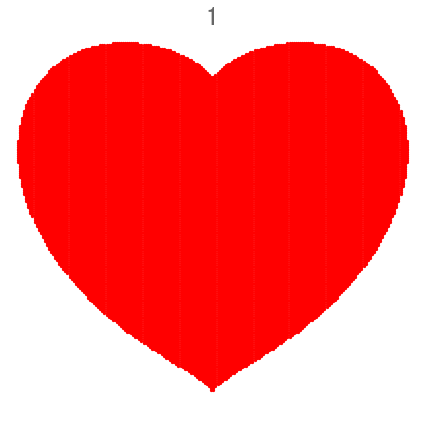

In [3]:
# 使用「面向对象」的方法画图
fig, ax = plt.subplots(figsize=(6, 6))

# 隐藏边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# 隐藏坐标轴刻度
ax.set_xticks([])
ax.set_yticks([])

# 设置坐标轴范围
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.15, 1.25)

# 记录进度
txt = ax.text(0, 1.35, '', fontsize=26, color=colors['深灰色'], ha='center')

# 动画函数
def animate(i):
    # 设置起止点
    start = points[i-1]
    end = points[i]
    
    # 画散点图
    ax.scatter(heart_x[start:end], heart_y[start:end], s=5, c='r')
    
    # 文字动态变化
    txt.set_text(str(i+1))

# 用函数的方式绘制动画，interval 表示间隔毫秒数
anim = FuncAnimation(fig, animate, frames=frames, interval=100)

# 保存为 mp4 的文件格式，需要安装二进制文件 ffmpeg，下载地址：http://www.ffmpeg.org/download.html
anim.save('爱心.mp4')

# 保存图片
plt.savefig('爱心.png')

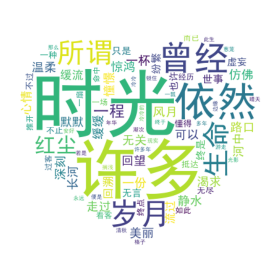

In [4]:
# 词云图的文本
text = '''
时光仿佛一杯静水，依然深刻，依然可以深流，而一份心情，却与风月无关，水逝惊鸿去。

站在时光的路口，回望曾经走过的美丽和温柔。

许多人，许多事，许多曾经花发枝满的渴求与憧憬，依然在岁月的长河中缓缓流过，又默默回溯。

世事纷繁，时光终是无言，所谓的执念也许只是虚妄，所谓的抵达也不过是终点。

生命不止，红尘无尽。仅以一程换一种懂得，仅以一程换一场经历，如此，而已。

谁又是谁生命中的看客和过客？推开一扇叫岁月的门，许多年华，终于被渐次搁浅。

而你，永远是斜格子里的光影，游走在梦与现实的边缘。

若是时光锁住的葱茏，曳动冷冷的素月清秋，那么，谁取你一瓢，醉饮红尘外？

此生，若你安好，便是晴天！
'''

# 分词
word_list = jieba.cut(text, cut_all=True)
word = ' '.join(word_list)

# 读取图片
pic = imread('爱心.png')

# 绘制词云图
wc = wordcloud.WordCloud(mask=pic, font_path='simhei.ttf', background_color='white').generate(word)

# 隐藏坐标轴
plt.axis('off')

# 生成词云图
plt.imshow(wc)

# 保存词云图
wc.to_file('词云图.png')

# 显示图片
plt.show()